# Handling Missing Data

## Introduction

In this project, I explore how to handle missing data in a retail dataset. We will use Python's `pandas` library for data manipulation, `seaborn` for visualization, and `scipy` for outlier detection. The goal of this project is to clean the data, handle missing values using various techniques, and prepare it for further analysis or modeling.

### Dataset: `train.csv`
This dataset contains product information, including categories and sales. Some columns have missing data, and we'll use various strategies to handle it.

## Step 1: Load Required Libraries

We'll start by loading the necessary libraries: 
- `pandas` for data manipulation,
- `numpy` for numerical operations,
- `seaborn` and `matplotlib` for data visualization,
- `scipy` for statistical analysis.

### Loading the Data
Next, we'll load the dataset into a pandas DataFrame to inspect its structure.

In [6]:
pip install summarytools

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import KNNImputer
from skimpy import skim
from summarytools import dfSummary

In [8]:
df = pd.read_csv('train.csv')
print("Initial DataFrame:")
df.head()

Initial DataFrame:


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 550068 │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA     ┃ NA %  ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ User_ID     │      0 │     0 │ 1003000 │   1728 │ 1000000 │ 1002000 │ 1003000 │ 1004000 │ 1006000 │ ▇▇▆▇▇▇ │  │
│ │ Occupation  │      0 │     0 │   8.077 │  6.523 │       0 │       2 │       7 │      14 │      20 │ ▇▅▃▃▃▅ │  │
│ │ Marital_Sta │      0 │     0 │  0.4097 │ 0.4918 │       0 │       0 │       0 │       1 │       1 │ ▇    ▆ │  │
│ │ tus         │        │       │         │        │         │         │         │         │         │        │  │
│ │ Product_Cat │      0 │     0 │   5.404 │  3.936 │       1 │       1 │       5 │       8 │      20 │ ▇▇▅▁▁  │  │
│ │ egory_1     │        │       │         │        │         │         │         │         │         │        │  │
│ │ Product_Cat │ 173638 │ 31.57 │   9.842 │  5.087 │       2 │       5 │       9 │      15 │      18 │ ▆▃▅▂▇▅ │  │
│ │ egory_2     │        │       │         │        │         │         │         │         │         │        │  │
│ │ Product_Cat │ 383247 │ 69.67 │   12.67 │  4.125 │       3 │       9 │      14 │      16 │      18 │ ▃▁▃▂▇▇ │  │
│ │ egory_3     │        │       │         │        │         │         │         │         │         │        │  │
│ │ Purchase    │      0 │     0 │    9264 │   5023 │      12 │    5823 │    8047 │   12050 │   23960 │ ▃▇▆▃▂▁ │  │
│ └─────────────┴────────┴───────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Product_ID                            │     0 │         0 │                        1 │              550068 │  │
│ │ Gender                                │     0 │         0 │                        1 │              550068 │  │
│ │ Age                                   │     0 │         0 │                        1 │              550068 │  │
│ │ City_Category                         │     0 │         0 │                        1 │              550068 │  │
│ │ Stay_In_Current_City_Years            │     0 │         0 │                        1 │              550068 │  │
│ └───────────────────────────────────────┴───────┴─────

In [13]:
dfSummary(df, is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,User_ID[int64],Mean (sd) : 1003028.8 (1727.6)min < med < max:1000001.0 < 1003077.0 < 1006040.0IQR (CV) : 2962.0 (580.6),"5,891 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACnElEQVR4nO3az4raUBiG8e9UHaJCggi68wYKXbj0InqxvYQuvALvwJ0gEjEzwfinqy5KYdTzmSavfX7riXHmezjnJEy4Xq8GtN2Xpr8AcI9u018Afwoh9M3szfERx+v1+vGs79MWrQ7VOTS5gYUQ+uPx+HuapqPYz9jv97sQwg+13/2W1obqHZrowN7SNB0tFouPLMvKRy/O8zxZLpej7Xb7ZmZKv/dNrQ3VHENremCOnSC9XC69LMt2k8nkPfL2/cjrWq3WUJ1bt3dojQzMsxNUVZWcz+evZVn+NLPYUF9SbaF6t27hoUXvBOv1erRarQan06kTe/Pz+dwzszSEEHO561xf5zNFnSuq67z1jKE1Kcuy8tGdYLfbuXaBoih6VVV9m81mnU6n8/Df3HOur/uZovYzaszAzPxDc64sZoJvDY7HYzdJksF8Pi+n0+nukWufcK6v9ZmizQ9T0bwri5nsWwMzMxsOh1GLgz3hXB+7MN2690uG6llZzJp/a4C/vWSovzlWFrMXfc2j6mao3neCEdehIc5zfa3z/jRU3gn+P7zn+rrnfWtFbfSdYJMcq4vkTuI919c977vOqE28E2ySZ3VR30liz/V1z/ulH6ZieVYX9Z2krQj1EzGri/JO0mb8hz8kECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokdO/5oTzPk0c/+HA4JGZmRVEkm81m8C+vV7236vf2Xn9PX78A0Vuyu83/NLAAAAAASUVORK5CYII="">",0(0.0%)
2,Product_ID[object],1. P002652422. P000254423. P001107424. P001121425. P000576426. P001849427. P000467428. P000580429. P0005944210. P0014504211. other,"1,880 (0.3%)1,615 (0.3%)1,612 (0.3%)1,562 (0.3%)1,470 (0.3%)1,440 (0.3%)1,438 (0.3%)1,422 (0.3%)1,406 (0.3%)1,406 (0.3%)534,817 (97.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADmUlEQVR4nO3cQWojZxRG0VdGOO1JCSHwEpI9eBG92F6EFpE9GOMaxB1PlEHHkISeNX0LlHNG1uwfXHg26PNyvV4HCnd7P4D/D7GRERsZsZERGxmxkREbGbGRERuZZWYeZmau1+vbzm/hxh3O5/PnmZllWb4Ijp/pbl3X07qup5m53/sx3Da/s5ERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmcO2bS9///y+60u4eTYIZBb/MouK39nI3C3L8tuyLJ/2fgi3725mfp2ZX/Z+CLfPGSUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3M3M7/PzJ97P4TbZ4NAxhklIzYyBi9kDF7IOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzYyFhXkbGuIuOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxhklIzYyBi9kDF7IOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxhklIzYy1lVkrKvIOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjIzYy1lVkrKvIOKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSsq8hYV5FxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMsvMPMzM/d4P4Sa9X6/Xt48Ph/P5/Hld19OeL+I2bdv2sizLl4/gDuu6np6ent6Ox+PXvR/H7Xh9ff10uVxOz8/P9zPzLbaZmePx+PXx8fGPXV/HLXr45wd/IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZE5zHz7OsjeD+G2fK+pw7ZtL5fL5TT/+ToI/Kht215m5v3js6+F8zP962vh1lVk/IFARmxkxEZGbGTERkZsZMRGRmxkxEbmL8G/flYakiJ2AAAAAElFTkSuQmCC"">",0(0.0%)
3,Gender[object],1. M2. F,"414,259 (75.3%)135,809 (24.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABPklEQVR4nO3bQWrDMBRF0a9iQjORMAYvxovoYrsI7cYYa9CETJRBZqGTOuLpk96zgg+5CcT4hVqrAQrBzM5mdup9CJq61VovvY94NkzT9BVjHHsfgnZKKVsI4dtbcEOMcVyW5ZJSuvY+Bq/b9/0z5zyu63oyM1+xmZmllK7zPP/0PgbNnHsf8JuP3gfg/yA2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUFmMHu8cNf7ELTh+bMcSilbznk0py/c4e9KKZuZ3Xrf8YzBy3tyOXgJTPmg4vmXzeW3E8e5nfJ5naPhOJdTPs9zNBznecrHv+M3w0NdyBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CDjcsrn7R604XbK53WOhuMYvEDmDgpbat8xea00AAAAAElFTkSuQmCC"">",0(0.0%)
4,Age[object],1. 26-352. 36-453. 18-254. 46-505. 51-556. 55+7. 0-17,"219,587 (39.9%)110,013 (20.0%)99,660 (18.1%)45,701 (8.3%)38,501 (7.0%)21,504 (3.9%)15,102 (2

## Step 2: Handle Missing Data

### 2.1 Visualizing Missing Data

Before cleaning the data, it's important to understand where the missing values are. We will visualize the missing data using a heatmap.


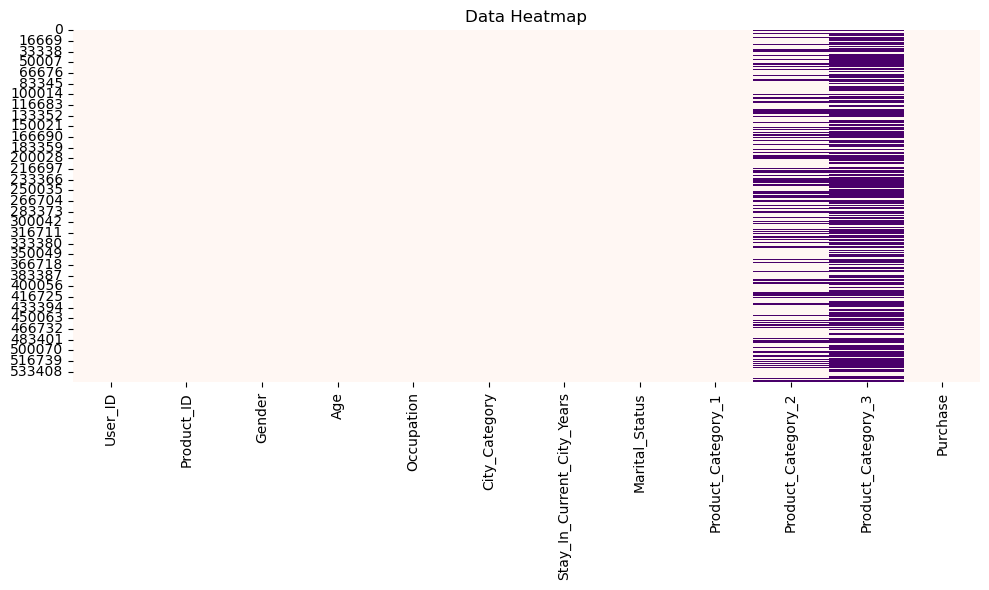

Missing values in each column:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [6]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df.isnull(), cbar=False, cmap='RdPu')
plt.title('Data Heatmap')
plt.tight_layout()
plt.show()

df_missing_sum = df.isnull().sum()
print("Missing values in each column:")
print(df_missing_sum)


### 2.2 Outlier Detection

Outliers can affect the filling of missing data, especially when using methods like mean or median. Here, we'll use the Z-score to detect and handle outliers in `Product_Category_2`.


In [7]:
# Outlier Detection
df_non_nan = df[['Product_Category_2']].dropna()
z_scores = stats.zscore(df_non_nan['Product_Category_2']) #values relation to the mean
abs_z_scores = np.abs(z_scores) #Absolute value
filtered_entries = abs_z_scores < 3
non_nan_indices = df_non_nan.index
filter_series = pd.Series(False, index=df.index)
filter_series.loc[non_nan_indices] = filtered_entries

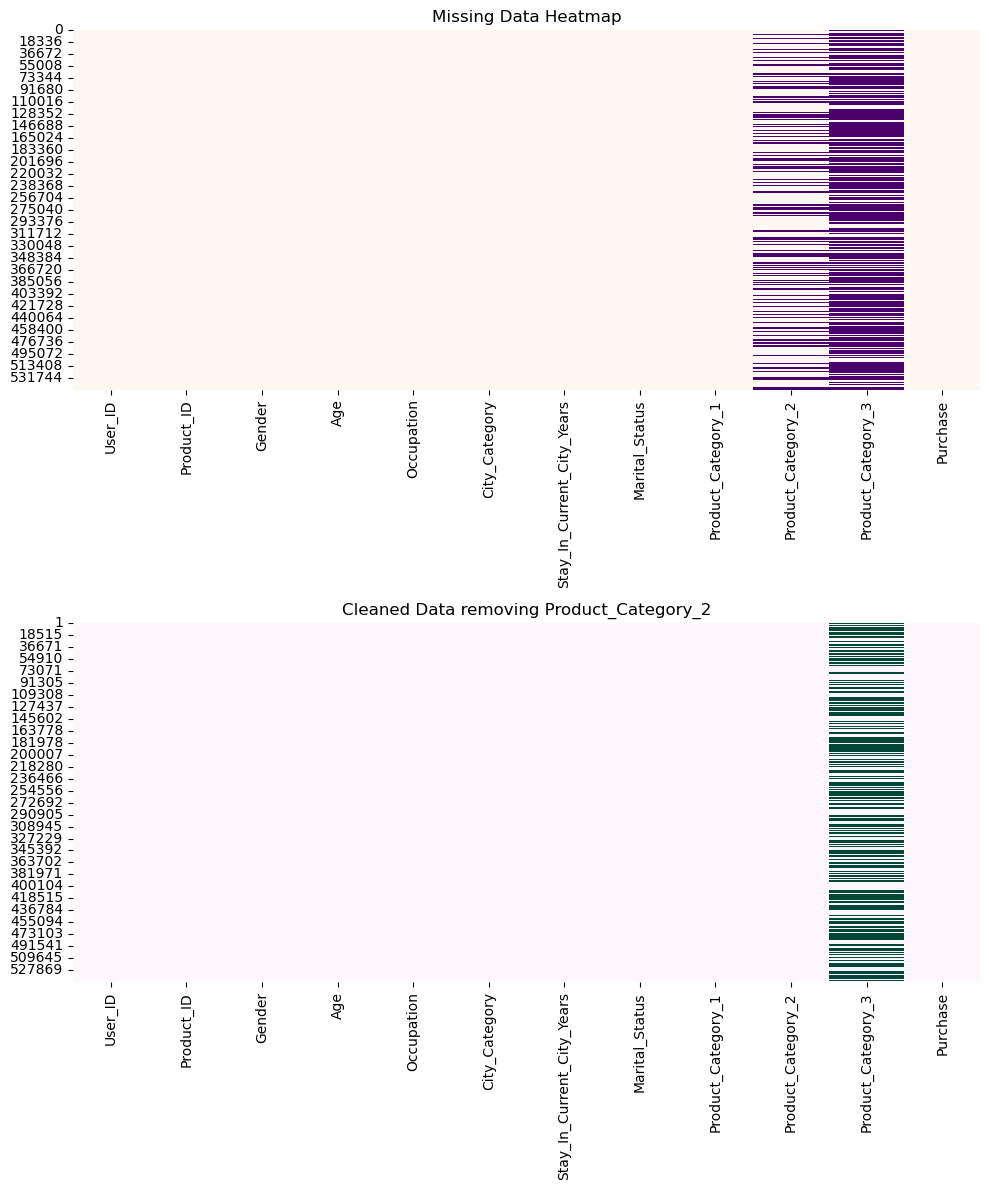

Missing values in columns  outliers in Product_Category_2:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            209609
Purchase                           0
dtype: int64


In [8]:
df_cleaned = df[filter_series]
plt.figure(figsize=(10, 12)) 

plt.subplot(2,1,1)
sns.heatmap(df.isnull(), cbar=False, cmap='RdPu')
plt.title('Missing Data Heatmap')

plt.subplot(2,1,2)
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='PuBuGn')
plt.title('Cleaned Data removing Product_Category_2')

plt.tight_layout()
plt.show()
print("Missing values in columns  outliers in Product_Category_2:")
print(df_cleaned.isnull().sum())

### 2.3 Dropping Missing Data

In some cases, dropping rows or columns with missing values is a viable option if the percentage of missing data is low. We'll try dropping rows and columns with missing values to see how much data is lost.


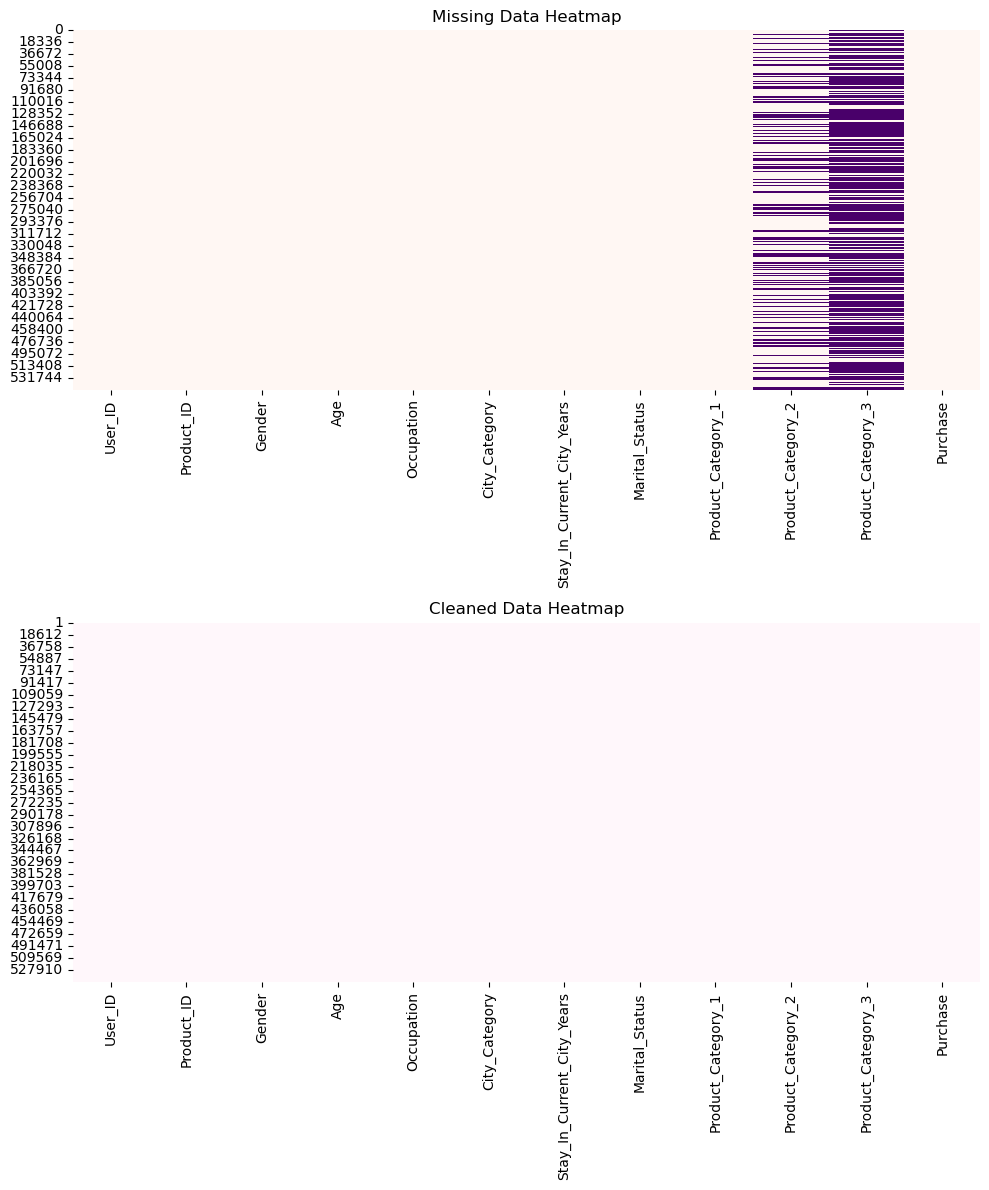

Missing values in columns after dropping Rows:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [9]:
df_clean = df.dropna()
plt.figure(figsize=(10, 12)) 

plt.subplot(2,1,1)
sns.heatmap(df.isnull(), cbar=False, cmap='RdPu')
plt.title('Missing Data Heatmap')

plt.subplot(2,1,2)
sns.heatmap(df_clean.isnull(), cbar=False, cmap='PuBuGn')
plt.title('Cleaned Data Heatmap')

plt.tight_layout()
plt.show()
print("Missing values in columns after dropping Rows:")
print(df_clean.isnull().sum())

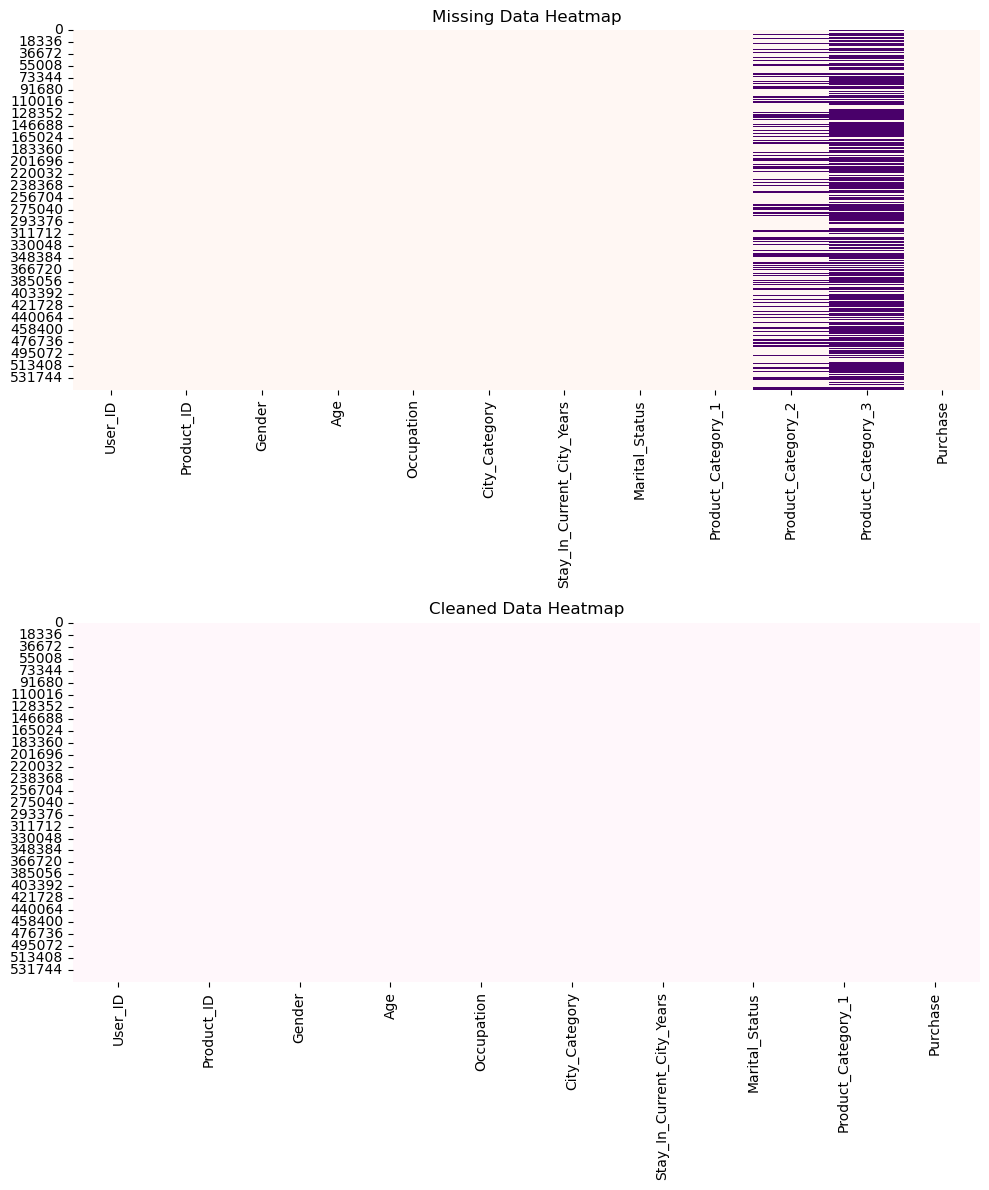

Missing values in columns after dropping columns:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64


In [10]:
df_clean_column = df.dropna(axis=1)
plt.figure(figsize=(10, 12)) 

plt.subplot(2,1,1)
sns.heatmap(df.isnull(), cbar=False, cmap='RdPu')
plt.title('Missing Data Heatmap')

plt.subplot(2,1,2)
sns.heatmap(df_clean_column.isnull(), cbar=False,cmap='PuBuGn')
plt.title('Cleaned Data Heatmap')

plt.tight_layout()
plt.show()
print("Missing values in columns after dropping columns:")
print(df_clean_column.isnull().sum())

### 2.4 Filling Missing Data

If dropping values isn't ideal (e.g., losing too much data), we can fill the missing values using several strategies:
- **Filling with zero**
- **Filling with median**
- **Filling with mean**
- **Filling with mode**

We'll demonstrate each technique for columns with missing data.


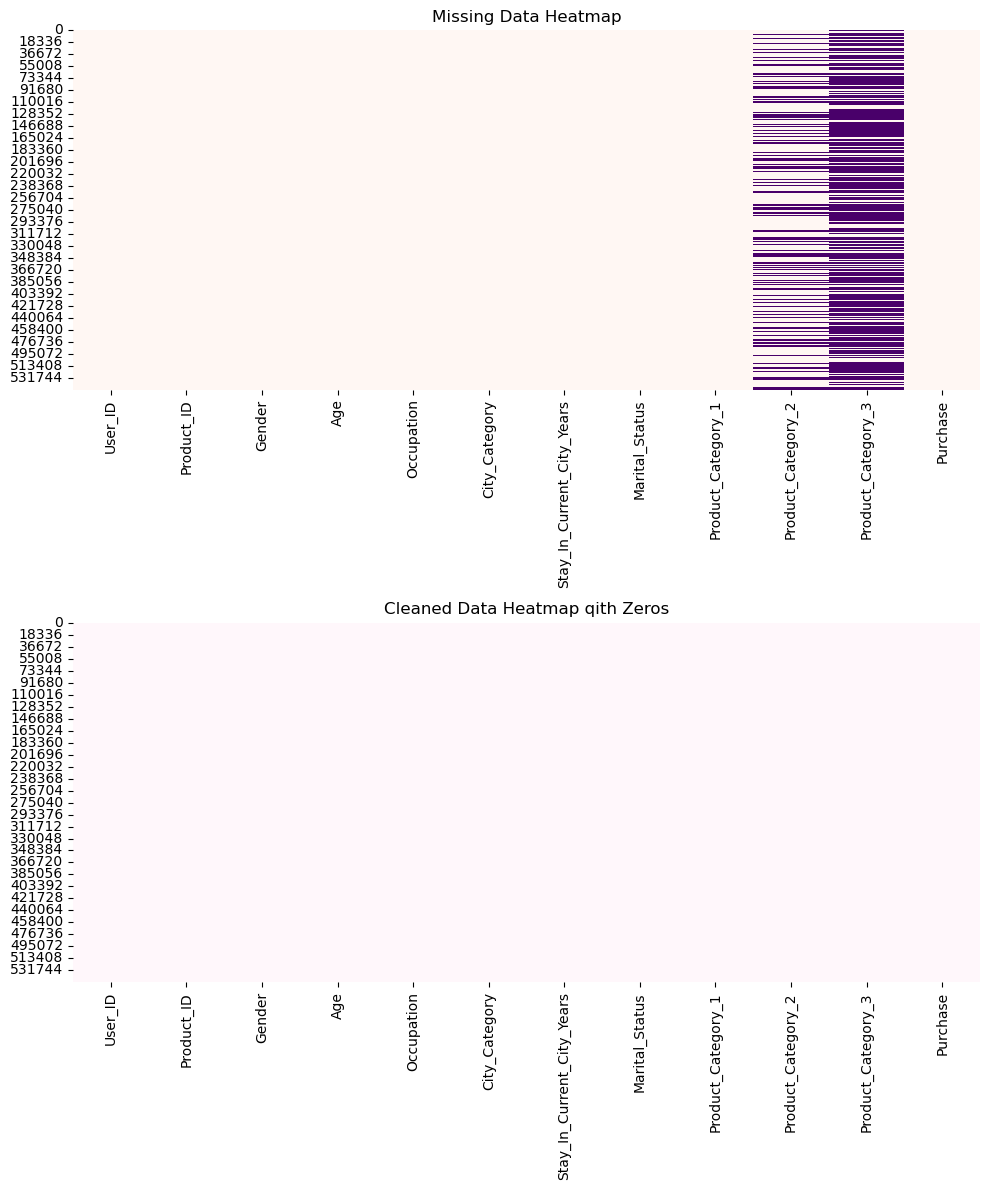

Missing values after filling with zero:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [13]:
df_filled = df.fillna(0)
plt.figure(figsize=(10, 12)) 

plt.subplot(2,1,1)
sns.heatmap(df.isnull(), cbar=False, cmap='RdPu')
plt.title('Missing Data Heatmap')

plt.subplot(2,1,2)
sns.heatmap(df_filled.isnull(), cbar=False, cmap='PuBuGn')
plt.title('Cleaned Data Heatmap qith Zeros')

plt.tight_layout()
plt.show()
print("Missing values after filling with zero:")
print(df_filled.isnull().sum())

### Median

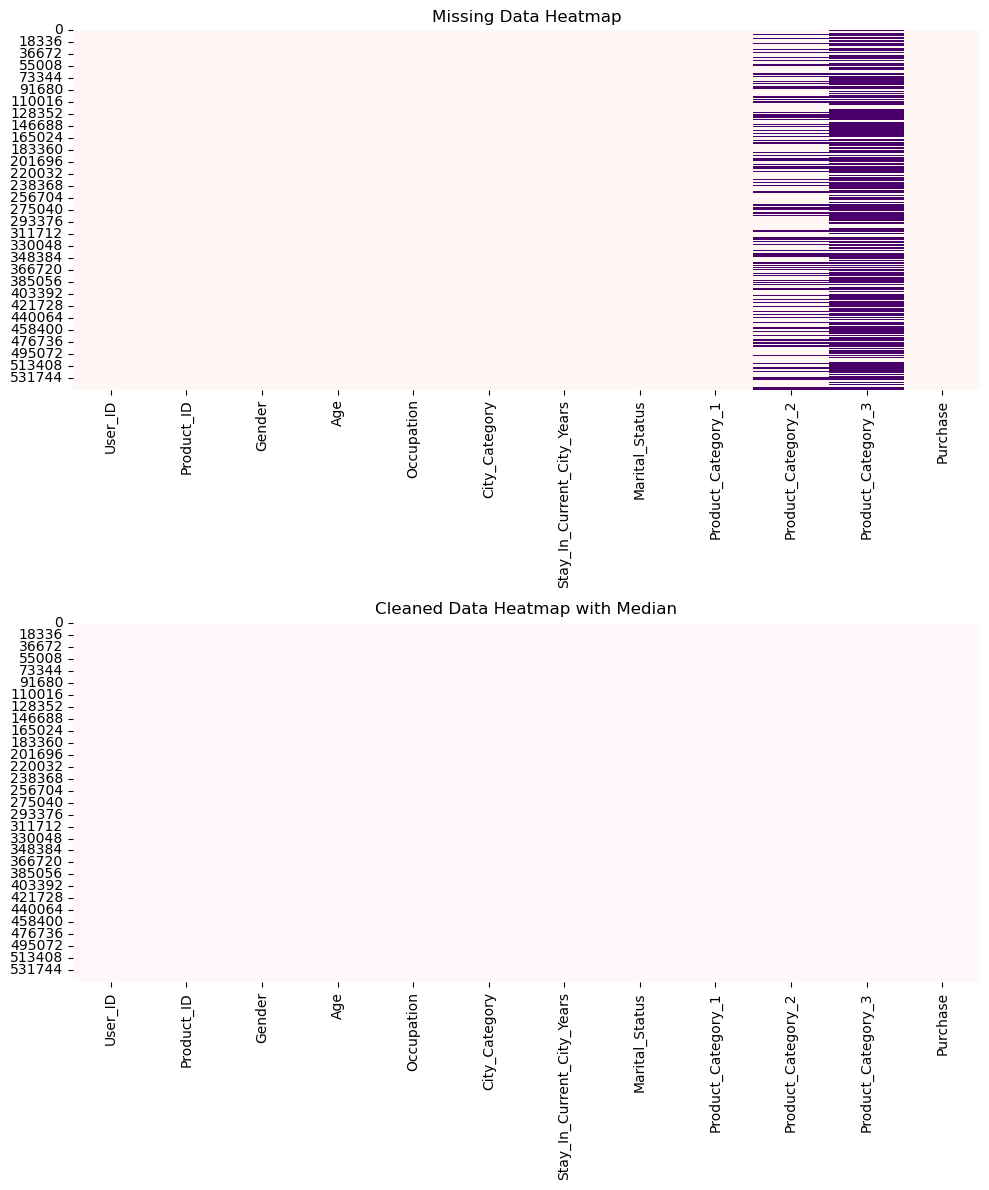

Missing values after filling with Median:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [16]:
# Fill missing values with median
df_median = df.fillna(df.select_dtypes(include=['number']).median())

plt.figure(figsize=(10, 12)) 

plt.subplot(2,1,1)
sns.heatmap(df.isnull(), cbar=False, cmap='RdPu')
plt.title('Missing Data Heatmap')

plt.subplot(2,1,2)
sns.heatmap(df_median.isnull(), cbar=False, cmap='PuBuGn')
plt.title('Cleaned Data Heatmap with Median')

plt.tight_layout()
plt.show()
print("Missing values after filling with Median:")
print(df_median.isnull().sum())
df_median.to_csv('cleaned_median.csv', index=False)


### Mean

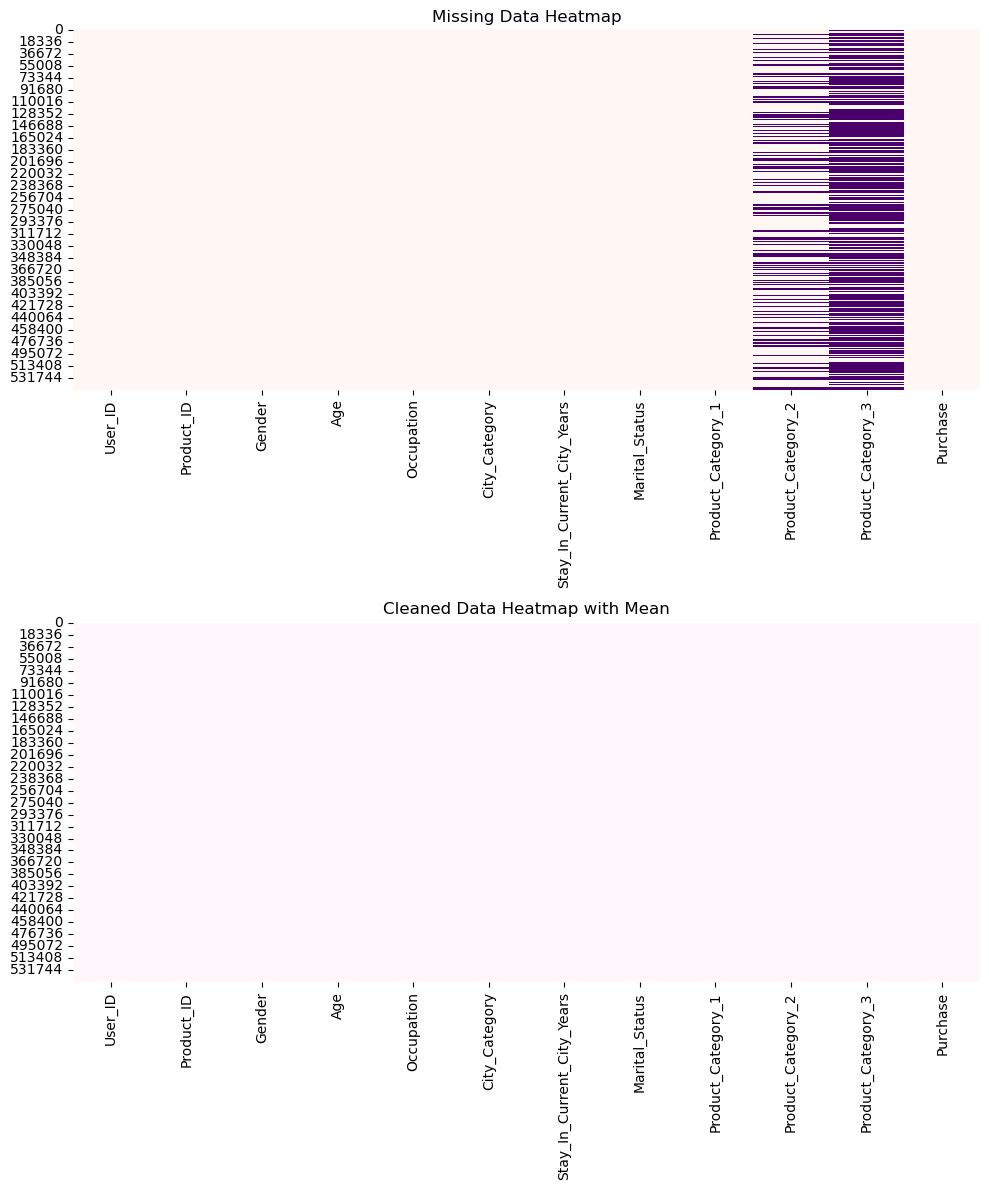

Missing values after filling with Mean:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [15]:
# Fill missing values with Mean
df_mean = df.fillna(df.select_dtypes(include=['number']).mean())
plt.figure(figsize=(10, 12)) 

plt.subplot(2, 1, 1)
sns.heatmap(df.isnull(), cbar=False, cmap='RdPu')
plt.title('Missing Data Heatmap')

plt.subplot(2, 1, 2)
sns.heatmap(df_mean.isnull(), cbar=False, cmap='PuBuGn')  
plt.title('Cleaned Data Heatmap with Mean')

plt.tight_layout()
plt.show()
print("Missing values after filling with Mean:")
print(df_mean.isnull().sum())

df_mean.to_csv('cleaned_mean.csv', index=False)



### Mode

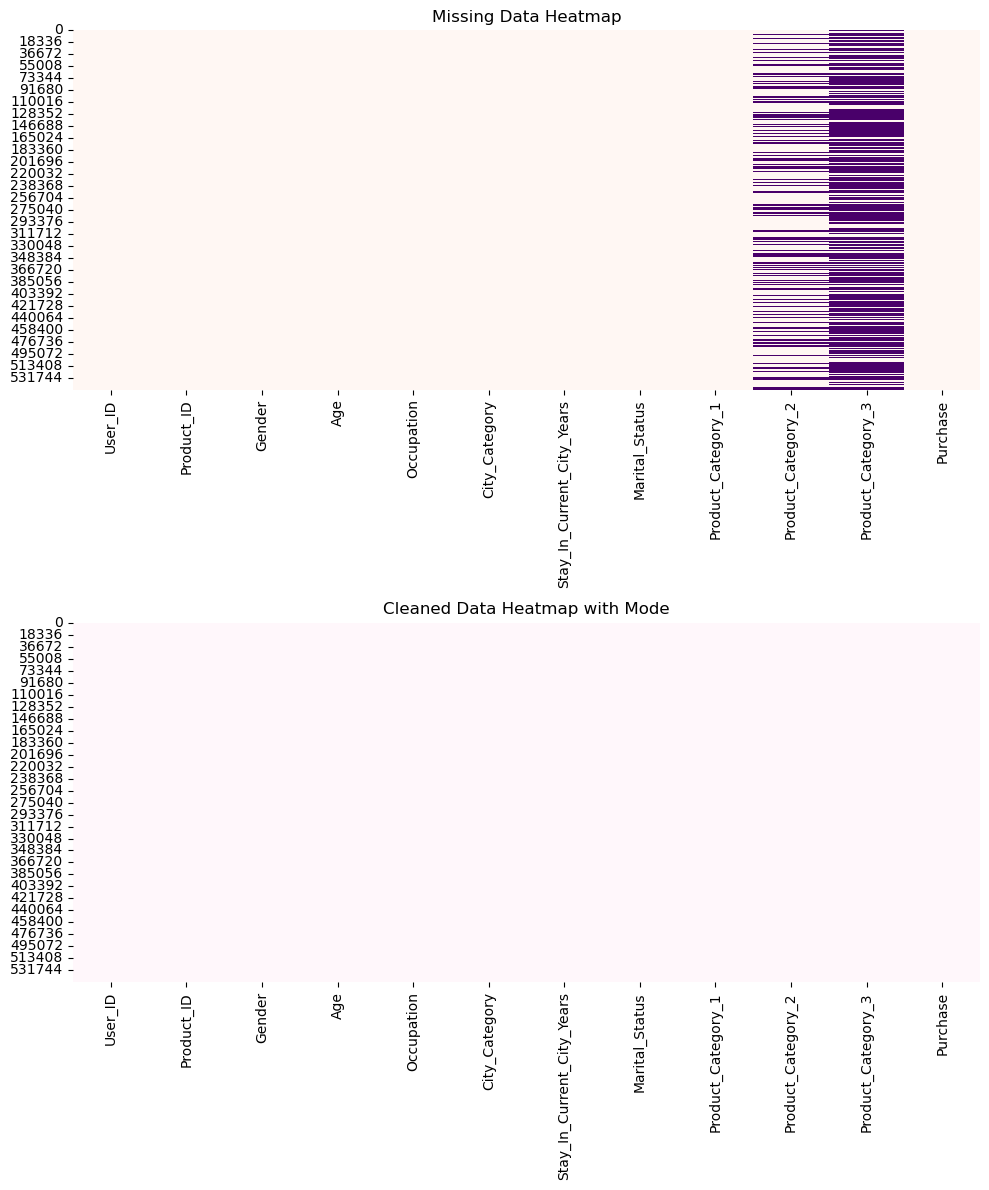

Missing values after filling with Mode:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [18]:
# Fill missing values with Mode
df_mode = df.fillna(df.mode().iloc[0])
plt.figure(figsize=(10, 12)) 

plt.subplot(2,1,1)
sns.heatmap(df.isnull(), cbar=False, cmap='RdPu')
plt.title('Missing Data Heatmap')

plt.subplot(2,1,2)
sns.heatmap(df_mode.isnull(), cbar=False, cmap='PuBuGn')
plt.title('Cleaned Data Heatmap with Mode')

plt.tight_layout()
plt.show()
print("Missing values after filling with Mode:")
print(df_mode.isnull().sum())

df_mode.to_csv('cleaned_mode.csv', index=False)


## Conclusion

In this project, we explored various strategies for handling missing data in a retail dataset. We visualized the missing values, detected outliers, and used techniques such as dropping, filling with statistical methods, and interpolation to handle the missing data. 

Next steps could include:
- Further outlier analysis,
- Feature engineering,
- Building predictive models using this cleaned dataset.



### Summary:
- **Step 1**: Load libraries and dataset.
- **Step 2**: Handle missing data through visualization, outlier detection, dropping, filling, and interpolation.
- **Conclusion**: Summarize findings and suggest next steps. 